## accidents

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
path = r"Book1.csv"
df = pd.read_csv(path)

In [90]:
df.head()

,Unnamed: 0,Accident_Severity,Number_of_Casualties,Day_of_Week,Speed_limit
0,0,2,1,3,30
1,1,3,1,4,30
2,2,3,1,5,30
3,3,3,1,6,30
4,4,3,1,2,30


In [91]:
df.tail()

,Unnamed: 0,Accident_Severity,Number_of_Casualties,Day_of_Week,Speed_limit
49994,49994,3,3,2,70
49995,49995,3,1,6,30
49996,49996,2,1,7,50
49997,49997,3,1,7,60
49998,49998,3,2,1,60


In [93]:
df.shape

(49999, 5)

## data visualise

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            49999 non-null  int64
 1   Accident_Severity     49999 non-null  int64
 2   Number_of_Casualties  49999 non-null  int64
 3   Day_of_Week           49999 non-null  int64
 4   Speed_limit           49999 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


In [95]:
df.describe()

,Unnamed: 0,Accident_Severity,Number_of_Casualties,Day_of_Week,Speed_limit
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,24999.000000,2.858977,1.301566,4.119002,33.543071
std,14433.612391,0.375258,0.742834,1.921766,9.730811
min,0.000000,1.000000,1.000000,1.000000,10.000000
25%,12499.500000,3.000000,1.000000,3.000000,30.000000
50%,24999.000000,3.000000,1.000000,4.000000,30.000000
75%,37498.500000,3.000000,1.000000,6.000000,30.000000
max,49998.000000,3.000000,23.000000,7.000000,70.000000


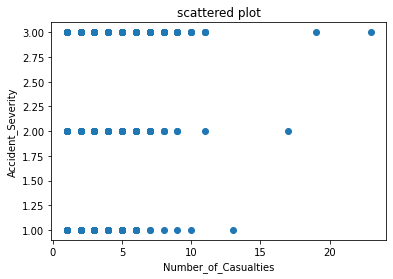

In [142]:
plt.scatter(x=df.Number_of_Casualties	 , y = df.Accident_Severity)
plt.xlabel('Number_of_Casualties')
plt.ylabel('Accident_Severity')
plt.title("scattered plot")
plt.show()

In [143]:
df.isnull().sum()

Unnamed: 0              0
Accident_Severity       0
Number_of_Casualties    0
Day_of_Week             0
Speed_limit             0
dtype: int64

In [144]:
x = df.drop("Number_of_Casualties",axis = "columns")
y = df.drop("Accident_Severity",axis = "columns")


In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=51)

In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [147]:
lr.fit(x_train,y_train)

LinearRegression()

In [148]:
lr.coef_

array([[ 1.00000000e+00,  2.72133265e-14,  5.00705169e-15,
        -1.14553975e-15],
       [ 6.32424266e-06, -1.24797683e-01,  2.64706012e-03,
         7.72224799e-03],
       [-4.73694208e-20,  9.54097912e-18,  1.00000000e+00,
         2.60208521e-18],
       [ 2.65366662e-17, -1.66533454e-15, -2.08166817e-17,
         1.00000000e+00]])

In [149]:
lr.intercept_

array([ 3.63797881e-12,  1.23272888e+00,  1.77635684e-15, -6.46593890e-13])

In [150]:
m=9.1
c=2.0
y=m*4+c
y

38.4

In [151]:
y_pred = lr.predict(x_test)
y_pred

array([[3.26990000e+04, 1.37666922e+00, 1.00000000e+00, 4.00000000e+01],
       [2.78970000e+04, 1.27701891e+00, 4.00000000e+00, 3.00000000e+01],
       [7.07700000e+03, 1.15328935e+00, 7.00000000e+00, 3.00000000e+01],
       ...,
       [3.81630000e+04, 1.46674126e+00, 4.00000000e+00, 3.00000000e+01],
       [3.01600000e+04, 1.59227941e+00, 1.00000000e+00, 7.00000000e+01],
       [3.11120000e+04, 1.29205723e+00, 2.00000000e+00, 3.00000000e+01]])

In [164]:
df=pd.DataFrame(np.c_[x_test, y_test ,y_pred],columns = ["Number_of_Casualties","Accident_Severity_original","Accident_Severity_predicted"])

TypeError: ignored

In [153]:
lr.score(x_test,y_test)

0.7589090215085951

In [166]:
import joblib
joblib.dump(lr,"Severity_predictor_model.pkl")

['Severity_predictor_model.pkl']